In [1]:
from sklearn import datasets
import numpy as np
boston = datasets.load_boston()
x = boston.data
y = boston.target

In [2]:
from sklearn.model_selection import train_test_split


In [3]:
bias = np.ones(x.shape[0])
bias = bias.reshape(-1,1)
x = np.hstack([bias,x])
x.shape

(506, 14)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(x)
x = scaler.transform(x)
y = y.reshape(-1,1)
scaler.fit(y)
y = scaler.transform(y)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 100)

In [6]:
import numpy as np

In [7]:
def cost(x,y,m):
    return ((x.dot(m) - y)**2).mean()

In [8]:
def step_gradient(x,y,lr,m):
    #print('x shape:',x.shape)
    #print('m shape',m.shape)
    yp = x.dot(m)
    #print('yp shape:',yp.shape)
    y = y.reshape(-1,1)
    #print('y shape:',y.shape)
    t = yp-y
    t = np.transpose(t)
    #print('t shape',t.shape)
    slope_m = t.dot(x)
    slope_m = slope_m.reshape(-1,1)
   # print('slope_m shape:',slope_m.shape)
    return slope_m

In [9]:
def gradient_descent(x,y,lr,num_iter,l):
    m = 2*np.random.random((x.shape[1],1)) - 1
    print('Start:',cost(x,y,m))
    l[0] = cost(x,y,m)
    for i in range(num_iter):
        m = m - lr*step_gradient(x,y,lr,m)
        if i%100 == 0:
            print(i,":",cost(x,y,m))
            l[i] = cost(x,y,m)
    print(i,':',cost(x,y,m))
    return m
        

In [287]:
def run(x,y,l):
    num_iter = 100000
    
    lr = 0.0000000002
    m = gradient_descent(x,y,lr,num_iter,l)
    return m
    

In [11]:
l = {}
m = run(x_train,y_train,l)

Start: 4.600348362496738
0 : 4.5178606971746715
100 : 1.759409842055503
200 : 1.0949812929362932
300 : 0.7879728878141197
400 : 0.6309776811100417
500 : 0.5427598552489362
600 : 0.4881347279103187
700 : 0.4511398268778692
800 : 0.42415296411601866
900 : 0.40331948352347324
1000 : 0.38656326852447614
1100 : 0.37268875789183564
1200 : 0.36095928538913175
1300 : 0.3508908245057957
1400 : 0.3421467068425491
1500 : 0.3344814110339042
1600 : 0.32770908027105056
1700 : 0.3216849748921514
1800 : 0.3162939622766784
1900 : 0.31144300022084026
2000 : 0.3070559909648506
2100 : 0.3030701100728283
2200 : 0.2994330966399267
2300 : 0.29610119815809627
2400 : 0.29303757886518444
2500 : 0.29021106715267
2600 : 0.2875951576701167
2700 : 0.285167208787429
2800 : 0.2829077923458172
2900 : 0.2808001636206085
3000 : 0.2788298271080386
3100 : 0.27698417929028185
3200 : 0.27525221362855395
3300 : 0.27362427612252044
3400 : 0.2720918621411055
3500 : 0.27064744706719357
3600 : 0.2692843447399084
3700 : 0.2679965

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize = (10,10))
plt.plot(l.keys(),l.values())
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<Figure size 1000x1000 with 1 Axes>

In [13]:
def CDetermination(y,yT):
    u = ((yT-y)**2).sum()
    v = ((yT - yT.mean())**2).sum()
    print('Coefficient of Determination:',1 - u/v)
yP = x_test.dot(m)
CDetermination(yP,y_test)

Coefficient of Determination: 0.7241365190234621


In [14]:
from sklearn.metrics import r2_score
y_test = y_test.reshape(-1,1)
r2_score(y_test,yP)

0.7241365190234621

In [15]:
m.shape

(14, 1)

In [299]:
import pandas as pd
xT = pd.read_csv(r'C:\Users\venug\Downloads\0000000000002419_test_ccpp_x_test.csv',header = None,skipinitialspace = True)
xTrain = pd.read_csv(r'C:\Users\venug\Downloads\0000000000002419_training_ccpp_x_y_train.csv',skipinitialspace = True)
#xTrain = xTrain.reshape(-1,14)
#xT = xT.reshape(-1,13)
bias = np.ones(xTrain.shape[0])
bias = bias.reshape(-1,1)
yTrain = xTrain.iloc[:,4]
xTrain = xTrain.iloc[:,0:4]
xTrain = np.hstack([bias,xTrain])
scaler = StandardScaler()
xTrain1 = scaler.fit_transform(xTrain)

print(xTrain.shape)
yTrain = np.array(yTrain).reshape(-1,1)
#scaler = scaler.fit(yTrain)
#yTrain = scaler.transform(yTrain)
xTrain.shape


(7176, 5)


(7176, 5)

In [39]:
x_train,x_test,y_train,y_test = train_test_split(xTrain,yTrain,random_state = 100)

In [300]:
l = {}
m = run(xTrain,yTrain,l)

Start: 1178214.0663899507
0 : 278777.2117156479
100 : 513.0757042258191
200 : 481.3893968722628
300 : 451.9862611646747
400 : 424.6932180627642
500 : 399.35066540543926
600 : 375.8114142419446
700 : 353.9397096715429
800 : 333.6103294560291
900 : 314.7077542070536
1000 : 297.12540344497097
1100 : 280.7649322811407
1200 : 265.5355838944669
1300 : 251.35359335835264
1400 : 238.14163872886078
1500 : 225.82833563116162
1600 : 214.34777188157528
1700 : 203.6390789587675
1800 : 193.64603739184733
1900 : 184.3167133670023
2000 : 175.60312406952056
2100 : 167.4609294760757
2200 : 159.84914849436475
2300 : 152.7298975148558
2400 : 146.06814959368302
2500 : 139.83151262768862
2600 : 133.99002501324136
2700 : 128.51596740066444
2800 : 123.38368926671386
2900 : 118.56944912932703
3000 : 114.05126732251897
3100 : 109.8087903354872
3200 : 105.82316579928988
3300 : 102.07692727744126
3400 : 98.55388808392524
3500 : 95.23904341392087
3600 : 92.1184801294077
3700 : 89.17929359414828
3800 : 86.409511000

31600 : 30.047247797174425
31700 : 30.036003050461982
31800 : 30.02478872994925
31900 : 30.013604716761524
32000 : 30.002450893831895
32100 : 29.9913271458396
32200 : 29.9802333591506
32300 : 29.9691694217605
32400 : 29.958135223239555
32500 : 29.94713065467977
32600 : 29.936155608644068
32700 : 29.92520997911722
32800 : 29.914293661458792
32900 : 29.903406552357733
33000 : 29.892548549788685
33100 : 29.8817195529701
33200 : 29.87091946232369
33300 : 29.860148179435583
33400 : 29.849405607018852
33500 : 29.838691648877496
33600 : 29.82800620987173
33700 : 29.817349195884603
33800 : 29.806720513789905
33900 : 29.79612007142119
34000 : 29.78554777754204
34100 : 29.775003541817437
34200 : 29.764487274786134
34300 : 29.753998887834094
34400 : 29.743538293169046
34500 : 29.733105403795705
34600 : 29.722700133492292
34700 : 29.712322396787545
34800 : 29.70197210893897
34900 : 29.691649185911515
35000 : 29.68135354435737
35100 : 29.671085101596304
35200 : 29.66084377559685
35300 : 29.65062948

62900 : 27.646975162713385
63000 : 27.64203155566131
63100 : 27.637100870456386
63200 : 27.632183073322444
63300 : 27.627278130571554
63400 : 27.622386008603915
63500 : 27.61750667390755
63600 : 27.612640093058033
63700 : 27.607786232718386
63800 : 27.602945059638714
63900 : 27.598116540656058
64000 : 27.593300642694164
64100 : 27.588497332763225
64200 : 27.583706577959685
64300 : 27.578928345465993
64400 : 27.574162602550356
64500 : 27.56940931656659
64600 : 27.564668454953818
64700 : 27.55993998523628
64800 : 27.555223875023117
64900 : 27.550520092008128
65000 : 27.54582860396958
65100 : 27.54114937876995
65200 : 27.536482384355715
65300 : 27.53182758875718
65400 : 27.52718496008817
65500 : 27.522554466545863
65600 : 27.517936076410614
65700 : 27.513329758045636
65800 : 27.508735479896885
65900 : 27.504153210492774
66000 : 27.49958291844397
66100 : 27.49502457244324
66200 : 27.49047814126513
66300 : 27.48594359376582
66400 : 27.48142089888292
66500 : 27.476910025635217
66600 : 27.472

94900 : 26.574182916597852
95000 : 26.572043417867814
95100 : 26.56990951141667
95200 : 26.567781182626963
95300 : 26.56565841691944
95400 : 26.563541199752947
95500 : 26.56142951662432
95600 : 26.559323353068365
95700 : 26.557222694657625
95800 : 26.555127527002405
95900 : 26.553037835750622
96000 : 26.55095360658768
96100 : 26.548874825236407
96200 : 26.546801477456942
96300 : 26.544733549046683
96400 : 26.542671025840114
96500 : 26.54061389370876
96600 : 26.538562138561094
96700 : 26.536515746342356
96800 : 26.53447470303462
96900 : 26.532438994656513
97000 : 26.53040860726326
97100 : 26.52838352694653
97200 : 26.526363739834338
97300 : 26.524349232090927
97400 : 26.522339989916766
97500 : 26.520335999548344
97600 : 26.518337247258163
97700 : 26.516343719354584
97800 : 26.514355402181764
97900 : 26.512372282119546
98000 : 26.510394345583386
98100 : 26.50842157902424
98200 : 26.506453968928486
98300 : 26.504491501817814
98400 : 26.50253416424915
98500 : 26.500581942814563
98600 : 26.

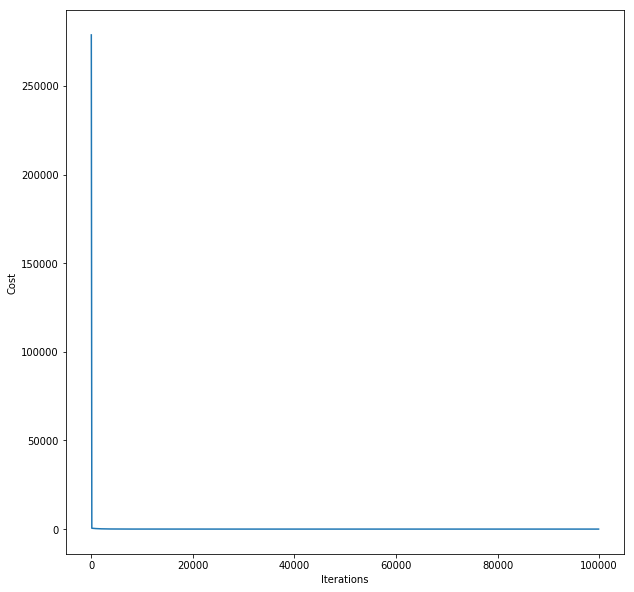

In [301]:
from matplotlib import pyplot as plt
plt.figure(figsize = (10,10))
plt.plot(l.keys(),l.values())
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [302]:
yP = xTrain.dot(m)

r2_score(yTrain,yP)

0.9098222232059726

In [303]:
bias = np.ones(xT.shape[0])
bias = bias.reshape(-1,1)
#scaler = scaler.fit(xT)
#xT= scaler.transform(xT)
xT = np.hstack([bias,xT])
#scaler = scaler.fit(xT)
#xT= scaler.transform(xT)

In [304]:
yP = xT.dot(m)

In [305]:

np.savetxt('PredictionsGradientDescent.csv',yP)

In [298]:
yP

array([[479.07138584],
       [451.99276699],
       [459.69949333],
       ...,
       [433.11741365],
       [460.65850745],
       [437.51843465]])